In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from collections import namedtuple

# Завдання 8


In [14]:
Task8Params = namedtuple('Task8Params', 'A0')
Task8Result = namedtuple('Task8Result', 'nsteps, history, histogram')
def Task8_1(params: Task8Params, n_steps=2000, seed=42, debug=False):
    rng = np.random.default_rng(seed)
    A0, = params
    n,m = A0.shape

    X = A0
    history = [X]
    histogram = dict()
    hash0 = tuple(X.ravel())
    histogram[hash0] = 1
    
    # return 2 random numbers
    def rand2(high): 
        return np.random.randint(0,high), np.random.randint(0,high)

    steps = 0
    while steps < n_steps:
        i1,i2 = rand2(n)
        j1,j2 = rand2(m)
        a,b,c,d = X[i1,j1], X[i1,j2], X[i2,j1], X[i2,j2]
        if a==d==1 and b==c==0:
            # positive checkerboard.
            X[i1,j1] = 0; X[i2,j2] = 0
            X[i1,j2] = 1; X[i2,j1] = 1
        elif a==d==0 and b==c==1:
            # negative checkerboard.
            X[i1,j1] = 1; X[i2,j2] = 1
            X[i1,j2] = 0; X[i2,j1] = 0
        else: 
            # not a checkerboard. skip.
            continue
        steps += 1
        
        history.append(X)
        hash = tuple(X.ravel())
        if hash in histogram:
            histogram[hash] += 1
        else:
            histogram[hash] = 1

    return Task8Result(n_steps, history, histogram)


In [24]:
def calc_deg(A):
    n,m = A.shape
    counter = 0
    for i1 in range(n):
        for i2 in range(i1, n):
            for j1 in range(m):
                for j2 in range(j1,m):
                    a,b,c,d = A[i1,j1], A[i1,j2], A[i2,j1], A[i2,j2]
                    if a==d==1 and b==c==0:
                        # positive checkerboard.
                        counter+=1
                    elif a==d==0 and b==c==1:
                        # negative checkerboard.
                        counter+=1
    return counter

def Task8_MCMC(params: Task8Params, n_steps=2000, seed=42, debug=False):
    rng = np.random.default_rng(seed)
    A0, = params
    n,m = A0.shape

    X = A0
    history = [X]
    histogram = dict()
    hash0 = tuple(X.ravel())
    histogram[hash0] = 1
    
    # return 2 random numbers
    def rand2(high): 
        return np.random.randint(0,high), np.random.randint(0,high)

    deg_cache = dict()
    deg_cache[hash0] = calc_deg(X)

    step = 0
    while step < n_steps:
        i1,i2 = rand2(n)
        j1,j2 = rand2(m)
        a,b,c,d = X[i1,j1], X[i1,j2], X[i2,j1], X[i2,j2]
        check = 0
        if a==d==1 and b==c==0:
            # positive checkerboard.
            check = 1
        elif a==d==0 and b==c==1:
            # negative checkerboard.
            check = -1
        else: 
            # not a checkerboard. skip.
            continue
        step += 1

        Xnew = X.copy()
        if check == 1:
            Xnew[i1,j1] = 0; Xnew[i2,j2] = 0
            Xnew[i1,j2] = 1; Xnew[i2,j1] = 1
        elif check == -1:
            Xnew[i1,j1] = 1; Xnew[i2,j2] = 1
            Xnew[i1,j2] = 0; Xnew[i2,j1] = 0

        hash0 = tuple(X.ravel())
        hash = tuple(Xnew.ravel())

        d0 = deg_cache[hash0]
        d = None
        if hash not in deg_cache:
            d = calc_deg(Xnew)
            deg_cache[hash] = d
        else:
            d = deg_cache[hash]

        alpha = np.minimum(1, d0/d)
        w = np.random.random()
        if w <= alpha:
            X = Xnew
        else:
            hash = hash0

        history.append(X)
        if hash in histogram:
            histogram[hash] += 1
        else:
            histogram[hash] = 1

    return Task8Result(n_steps, history, histogram)


In [12]:
A0 = np.array([
    [1,1,1,0],
    [1,1,0,0],
    [0,0,0,1]
])
params = Task8Params(A0)

Метод 1
matrix count =  8


Text(0.5, 1.0, 'Method 1. histogram')

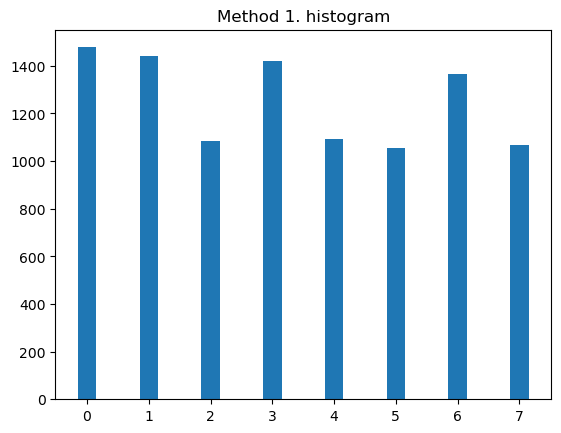

In [26]:
res1 = Task8_1(params, n_steps=10000)

print("Метод 1")
N = len(res1.histogram.keys())
print("matrix count = ", N)
plt.bar(range(N), res1.histogram.values(), 0.3)
plt.title('Method 1. histogram')

Метод 2
matrix count =  8


Text(0.5, 1.0, 'Method 2. histogram')

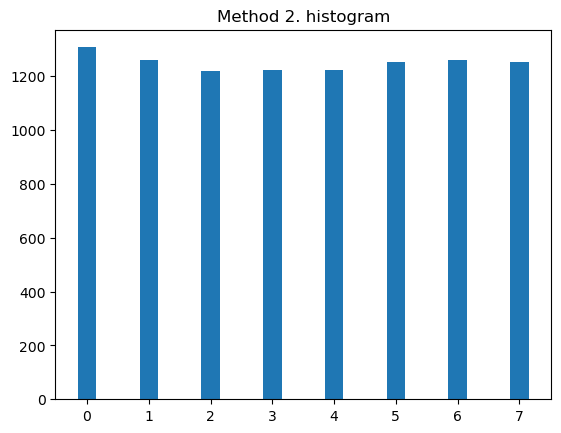

In [27]:
res2 = Task8_MCMC(params, n_steps=10000)

print("Метод 2")
N = len(res2.histogram.keys())
print("matrix count = ", N)
plt.bar(range(N), res2.histogram.values(), 0.3)
plt.title('Method 2. histogram')